<a href="https://colab.research.google.com/github/namanverma16/Stockprice/blob/main/lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
#####! pip install streamlit

In [ ]:
start = '2010-01-01'
end = '2019-12-31'



In [ ]:
df = pd.read_csv('/content/AAPL.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-2010,7.622500,7.660714,7.585000,7.643214,6.535085,493729600
1,05-01-2010,7.664286,7.699643,7.616071,7.656429,6.546383,601904800
2,06-01-2010,7.656429,7.686786,7.526786,7.534643,6.442255,552160000
3,07-01-2010,7.562500,7.571429,7.466071,7.520714,6.430344,477131200
4,08-01-2010,7.510714,7.571429,7.466429,7.570714,6.473097,447610800


In [ ]:
###from google.colab import drive
####drive.mount('/content/drive')

In [ ]:
df.shape

(2768, 7)

In [ ]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,04-01-2010,7.622500,7.660714,7.585000,7.643214,6.535085,493729600
1,1,05-01-2010,7.664286,7.699643,7.616071,7.656429,6.546383,601904800
2,2,06-01-2010,7.656429,7.686786,7.526786,7.534643,6.442255,552160000
3,3,07-01-2010,7.562500,7.571429,7.466071,7.520714,6.430344,477131200
4,4,08-01-2010,7.510714,7.571429,7.466429,7.570714,6.473097,447610800


In [ ]:
df = df.drop(['Date','Adj Close'],axis=1)         #Date aur Adj Close ko hatana
df.head()

,index,Open,High,Low,Close,Volume
0,0,7.622500,7.660714,7.585000,7.643214,493729600
1,1,7.664286,7.699643,7.616071,7.656429,601904800
2,2,7.656429,7.686786,7.526786,7.534643,552160000
3,3,7.562500,7.571429,7.466071,7.520714,477131200
4,4,7.510714,7.571429,7.466429,7.570714,447610800


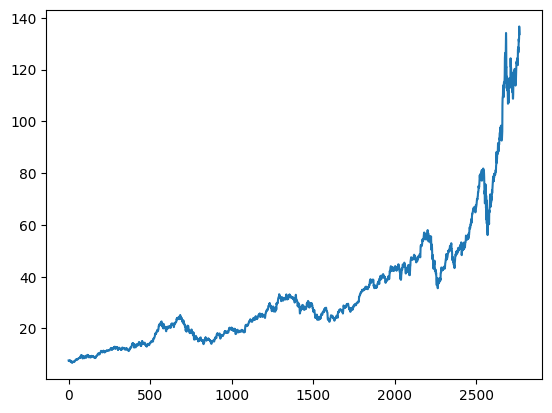

In [ ]:
plt.plot(df.Close)                             # Close column ka graph plot karna

In [ ]:
ma100 = df.Close.rolling(100).mean()            #  moving average nikalna 100 ka
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    118.000475
2764    118.223525
2765    118.489800
2766    118.699475
2767    118.925550
Name: Close, Length: 2768, dtype: float64

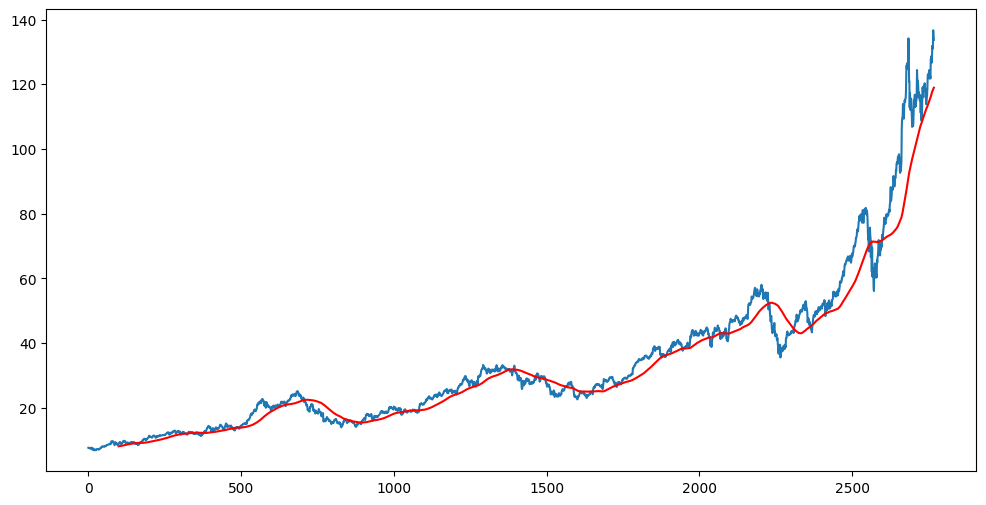

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()          #  moving average nikalna 200 ka
ma100
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763     98.809175
2764     99.158737
2765     99.494725
2766     99.866312
2767    100.218837
Name: Close, Length: 2768, dtype: float64

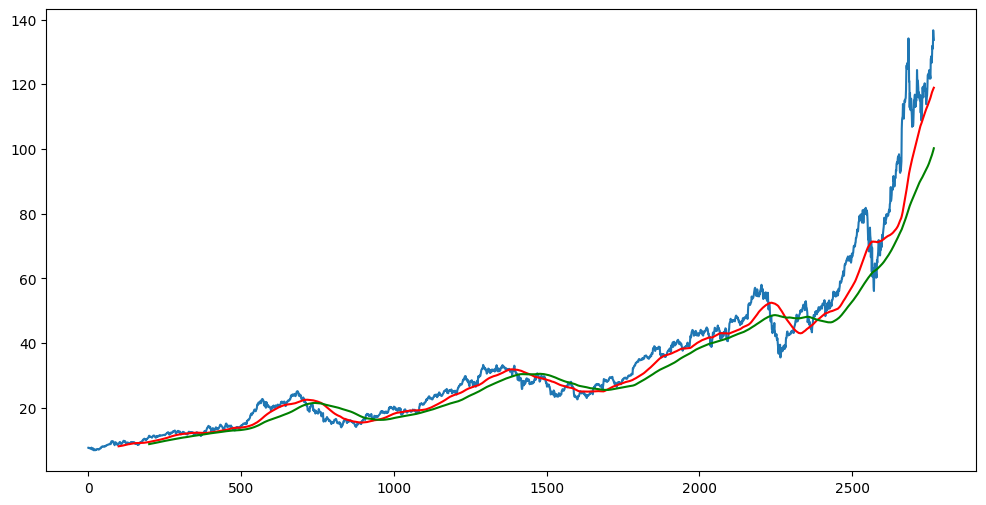

In [ ]:
plt.figure(figsize=(12,6))                    #   graph plot karna with both moving averages
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [ ]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])         #data split krna
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [ ]:
print(data_training.shape)           ## printing splitted data just to see
print(data_testing.shape)

(1937, 1)
(831, 1)


In [ ]:
data_training.head()              ##  printing training data just to see

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
from sklearn.preprocessing import MinMaxScaler      #### for LSTM model we have to scale down the data between 0 and 1 ,
scaler = MinMaxScaler(feature_range=(0,1))          #### we cannot provide this data

In [ ]:
data_training_array = scaler.fit_transform(data_training)       ### fitting the training data to scaler
data_training_array

array([[0.02296348],
       [0.02335041],
       [0.01978458],
       ...,
       [0.96032626],
       [0.98133428],
       [0.97664956]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]) :
  x_train.append(data_training_array[i-100 : i])
  y_train.append(data_training_array[i , 0])

#x_train             #####  use to see x_train

###  now we have to convert x_train and y_train to numpy arrays to provide these to LSTM model
x_train , y_train = np.array(x_train) , np.array(y_train)


In [ ]:
from keras.layers import Dense , Dropout , LSTM            #########    ML MODEL
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50 , activation='relu' , return_sequences=True , input_shape=(x_train.shape[1] , 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60 , activation='relu' , return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80 , activation='relu' , return_sequences=True ))
model.add(Dropout(0.4))


model.add(LSTM(units = 120 , activation='relu' ))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit(x_train , y_train , epochs=50)

Epoch 1/50
58/58 [==============================] - 22s 273ms/step - loss: 0.0677
Epoch 2/50
58/58 [==============================] - 16s 276ms/step - loss: 0.0103
Epoch 3/50
58/58 [==============================] - 17s 291ms/step - loss: 0.0089
Epoch 4/50
58/58 [==============================] - 16s 273ms/step - loss: 0.0076
Epoch 5/50
58/58 [==============================] - 16s 274ms/step - loss: 0.0066
Epoch 6/50
34/58 [================>.............] - ETA: 7s - loss: 0.0065

In [ ]:
###import pickle

In [ ]:
model.save('keras_model.h5')
####print(path)
# filepath = r'/keras_model.pckl'
# pickle.dump(model, open(filepath, 'wb'))


In [ ]:
####!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [ ]:
####!unzip ngrok-stable-linux-amd64.zip

In [ ]:
####get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
####!curl -s http://localhost:4040/api/tunnels | python3 -c \

In [ ]:
####!wget https://raw.githubusercontent.com/dataprofessor/code/master/streamlit/iris-ml-app.py

In [ ]:
#####!streamlit run /content/app.py &>/dev/null&

In [ ]:
###! pip install pyngrok
###from pyngrok import ngrok
# ##Setup a tunnel to the streamlit port 8501
##public_url = ngrok.connect(port='8502')
###public_url

In [ ]:
data_testing.head()

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing , ignore_index=True)

In [ ]:
final_df.head()

In [ ]:
########     previous data is not scaled down , so we have to scale down this data
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100 : i])
  y_test.append(input_data[i , 0])

In [ ]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
#########    MAKING PREDICTIONS

y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/0.00988704
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label='Original Price')
plt.plot(y_predicted , 'r' , label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Pirce')
plt.legend()
plt.show()

In [ ]:
###!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [ ]:
###!unzip ngrok-stable-linux-amd64.zip

In [ ]:
###get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
###!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

In [ ]:
###!streamlit run /content/app.py

In [ ]:
%%writefile app.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
! pip install streamlit
from keras.models import load_model
import streamlit as st

start = '2010-01-01'
end = '2019-12-31'

st.title("STOCK TREND PREDICTION")
df = pd.read_csv('/content/AAPL.csv')
df.head()

In [ ]:
!ls

In [ ]:
!ngrok authtoken XXXXX

In [ ]:
!ngrok

In [ ]:
from pyngrok import ngrok

In [ ]:
# !nohub streamlit run app.py
!streamlit run app.py&>/dev/null&

In [ ]:
!pgrep streamlit

In [ ]:
publ_url=ngrok.connect(port='8501')

In [ ]:
publ_url